This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist # importing the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # loading the dataset into training and testing data and labels 

In [2]:
train_images.shape # displaying the shape of the training images

(60000, 28, 28)

In [3]:
len(train_labels) # displaying the length of the training labels

60000

In [4]:
train_labels # displaying the training labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape # displaying the shape of the testing images 

(10000, 28, 28)

In [6]:
len(test_labels) # displaying the length of the testing labels 

10000

In [7]:
test_labels # displaying the testing labels 

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [8]:
from tensorflow import keras # importing the keras module from tensorflow
from tensorflow.keras import layers # importing the layers module from keras 
model = keras.Sequential([ # creating a sequential model
    layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function
    layers.Dense(10, activation="softmax") # adding a dense layer with 10 neurons and softmax activation function
])

**The compilation step**

In [9]:
model.compile(optimizer="rmsprop", # compiling the model with the rmsprop optimizer 
              loss="sparse_categorical_crossentropy", # using the sparse categorical crossentropy loss function 
              metrics=["accuracy"]) # using the accuracy metric to evaluate the model 

**Preparing the image data**

In [10]:
train_images = train_images.reshape((60000, 28 * 28)) # reshaping the training images to have 60000 rows and 28*28 columns 
train_images = train_images.astype("float32") / 255 # normalizing the training images by dividing by 255 to scale the values between 0 and 1 
test_images = test_images.reshape((10000, 28 * 28)) # reshaping the testing images to have 10000 rows and 28*28 columns 
test_images = test_images.astype("float32") / 255 # normalizing the testing images by dividing by 255 to scale the values between 0 and 1

**"Fitting" the model**

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128) # fitting the model to the training data with 5 epochs and a batch size of 128 

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2560 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0685 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0507 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0379 - accuracy: 0.9886


**Using the model to make predictions**

In [12]:
test_digits = test_images[0:10] # selecting the first 10 testing images 
predictions = model.predict(test_digits) # making predictions on the first 10 testing images 
predictions[0] # displaying the first prediction 

1/1 [==============================] - 0s 47ms/step


array([1.0830179e-09, 6.0928373e-11, 3.8332070e-07, 1.2775445e-06,
       6.1016237e-13, 7.6700601e-09, 3.5960821e-14, 9.9999833e-01,
       2.7385409e-08, 2.0463677e-08], dtype=float32)

In [13]:
predictions[0].argmax() # displaying the index of the maximum value in the first prediction 

7

In [14]:
predictions[0][7] # displaying the probability of the first prediction being a 7 

0.99999833

In [15]:
test_labels[0] # displaying the actual label of the first testing image

7

**Evaluating the model on new data**

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels) # evaluating the model on the testing data 
print(f"test_acc: {test_acc}") # printing the accuracy of the model on the testing data

313/313 [==============================] - 0s 445us/step - loss: 0.0642 - accuracy: 0.9805
test_acc: 0.9804999828338623


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [17]:
import numpy as np # importing the numpy module
x = np.array(12) # creating a scalar 
x # displaying the scalar

array(12)

In [18]:
x.ndim # displaying the number of dimensions of the scalar

0

### Vectors (rank-1 tensors)

In [19]:
x = np.array([12, 3, 6, 14, 7]) # creating a 1D array 
x # displaying the 1D array

array([12,  3,  6, 14,  7])

In [20]:
x.ndim # displaying the number of dimensions of the 1D array

1

### Matrices (rank-2 tensors)

In [21]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]]) # creating a 2D array
x.ndim # displaying the number of dimensions of the 2D array

2

### Rank-3 and higher-rank tensors

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]]) # creating a 3D array
x.ndim # displaying the number of dimensions of the 3D array

3

### Key attributes

In [23]:
from tensorflow.keras.datasets import mnist # importing the mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # loading the mnist dataset into training and testing data and labels

In [24]:
train_images.ndim # displaying the number of dimensions of the training images

3

In [25]:
train_images.shape # displaying the shape of the training images

(60000, 28, 28)

In [26]:
train_images.dtype # displaying the data type of the training images

dtype('uint8')

**Displaying the fourth digit**

/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/

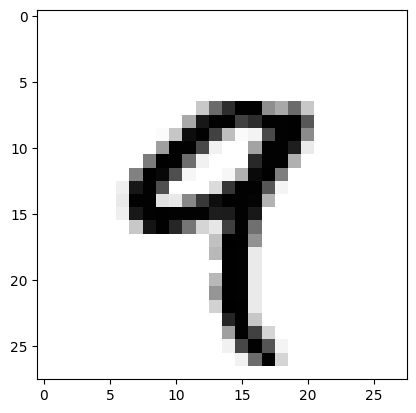

In [27]:
import matplotlib.pyplot as plt # importing the matplotlib module
digit = train_images[4] # selecting the 5th training image
plt.imshow(digit, cmap=plt.cm.binary) # displaying the 5th training image
plt.show() # displaying the plot

In [28]:
train_labels[4] # displaying the label of the 5th training image

9

### Manipulating tensors in NumPy

In [29]:
my_slice = train_images[10:100] # selecting a slice of the training images
my_slice.shape # displaying the shape of the slice

(90, 28, 28)

In [30]:
my_slice = train_images[10:100, :, :] # selecting a slice of the training images
my_slice.shape # displaying the shape of the slice

(90, 28, 28)

In [31]:
my_slice = train_images[10:100, 0:28, 0:28] # selecting a slice of the training images
my_slice.shape # displaying the shape of the slice

(90, 28, 28)

In [32]:
my_slice = train_images[:, 14:, 14:] # selecting a slice of the training images

In [33]:
my_slice = train_images[:, 7:-7, 7:-7] # selecting a slice of the training images

### The notion of data batches

In [34]:
batch = train_images[:128] # selecting a batch of the training images

In [35]:
batch = train_images[128:256] # selecting a batch of the training images

In [36]:
n = 3 # setting the batch size
batch = train_images[128 * n:128 * (n + 1)] # selecting a batch of the training images

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [37]:
def naive_relu(x): # defining a function to apply the relu function to an array
    assert len(x.shape) == 2 # checking that the input is a 2D array
    x = x.copy() # creating a copy of the input array
    for i in range(x.shape[0]): # iterating over the rows of the array
        for j in range(x.shape[1]): # iterating over the columns of the array
            x[i, j] = max(x[i, j], 0) # applying the relu function to each element of the array
    return x # returning the modified array

In [38]:
def naive_add(x, y): # defining a function to add two arrays
    assert len(x.shape) == 2 # checking that the first input is a 2D array
    assert x.shape == y.shape # checking that the two inputs have the same shape
    x = x.copy() # creating a copy of the first input array
    for i in range(x.shape[0]): # iterating over the rows of the first input array
        for j in range(x.shape[1]): # iterating over the columns of the first input array
            x[i, j] += y[i, j] # adding the corresponding elements of the two input arrays
    return x # returning the modified array

In [39]:
import time # importing the time module

x = np.random.random((20, 100)) # creating a random 2D array 
y = np.random.random((20, 100)) # creating a random 2D array

t0 = time.time() # recording the current time 
for _ in range(1000): # iterating 1000 times
    z = x + y # adding the two arrays
    z = np.maximum(z, 0.) # applying the relu function to the result
print("Took: {0:.2f} s".format(time.time() - t0)) # printing the time taken to complete the operation

Took: 0.00 s


In [40]:
t0 = time.time() # recording the current time
for _ in range(1000): # iterating 1000 times
    z = naive_add(x, y) # adding the two arrays
    z = naive_relu(z) # applying the relu function to the result
print("Took: {0:.2f} s".format(time.time() - t0)) # printing the time taken to complete the operation

Took: 0.70 s


### Broadcasting

In [41]:
import numpy as np # importing the numpy module
X = np.random.random((32, 10)) # creating a random 2D array
y = np.random.random((10,)) # creating a random 1D array

In [42]:
y = np.expand_dims(y, axis=0) # expanding the dimensions of the 1D array

In [43]:
Y = np.concatenate([y] * 32, axis=0) # concatenating the 1D array 32 times along the first axis

In [44]:
def naive_add_matrix_and_vector(x, y): # defining a function to add a matrix and a vector
    assert len(x.shape) == 2 # checking that the first input is a 2D array
    assert len(y.shape) == 1 # checking that the second input is a 1D array
    assert x.shape[1] == y.shape[0] # checking that the two inputs have compatible shapes
    x = x.copy() # creating a copy of the first input array
    for i in range(x.shape[0]): # iterating over the rows of the first input array
        for j in range(x.shape[1]): # iterating over the columns of the first input array
            x[i, j] += y[j] # adding the corresponding elements of the two input arrays
    return x # returning the modified array

In [45]:
import numpy as np # importing the numpy module
x = np.random.random((64, 3, 32, 10)) # creating a random 4D array
y = np.random.random((32, 10)) # creating a random 2D array
z = np.maximum(x, y) # applying the element-wise maximum function to the two arrays

### Tensor product

In [46]:
x = np.random.random((32,)) # creating a random 1D array
y = np.random.random((32,)) # creating a random 1D array
z = np.dot(x, y) # computing the dot product of the two arrays

In [47]:
def naive_vector_dot(x, y): # defining a function to compute the dot product of two arrays
    assert len(x.shape) == 1 # checking that the first input is a 1D array
    assert len(y.shape) == 1 # checking that the second input is a 1D array
    assert x.shape[0] == y.shape[0] # checking that the two inputs have the same length
    z = 0. # initializing the result
    for i in range(x.shape[0]): # iterating over the elements of the first input array
        z += x[i] * y[i] # computing the dot product of the two arrays
    return z # returning the result

In [48]:
def naive_matrix_vector_dot(x, y): # defining a function to compute the dot product of a matrix and a vector
    assert len(x.shape) == 2 # checking that the first input is a 2D array
    assert len(y.shape) == 1 # checking that the second input is a 1D array
    assert x.shape[1] == y.shape[0] # checking that the two inputs have compatible shapes
    z = np.zeros(x.shape[0]) # initializing the result
    for i in range(x.shape[0]): # iterating over the rows of the first input array
        for j in range(x.shape[1]): # iterating over the columns of the first input array
            z[i] += x[i, j] * y[j] # computing the dot product of the two arrays
    return z # returning the result

In [49]:
def naive_matrix_vector_dot(x, y): # defining a function to compute the dot product of a matrix and a vector
    z = np.zeros(x.shape[0]) # initializing the result
    for i in range(x.shape[0]): # iterating over the rows of the first input array
        z[i] = naive_vector_dot(x[i, :], y) # computing the dot product of the two arrays
    return z # returning the result

In [50]:
def naive_matrix_dot(x, y): # defining a function to compute the dot product of two matrices
    assert len(x.shape) == 2 # checking that the first input is a 2D array
    assert len(y.shape) == 2 # checking that the second input is a 2D array
    assert x.shape[1] == y.shape[0] # checking that the two inputs have compatible shapes
    z = np.zeros((x.shape[0], y.shape[1])) # initializing the result
    for i in range(x.shape[0]): # iterating over the rows of the first input array
        for j in range(y.shape[1]): # iterating over the columns of the second input array
            row_x = x[i, :] # selecting the i-th row of the first input array
            column_y = y[:, j] # selecting the j-th column of the second input array
            z[i, j] = naive_vector_dot(row_x, column_y) # computing the dot product of the two arrays
    return z # returning the result

### Tensor reshaping

In [51]:
train_images = train_images.reshape((60000, 28 * 28)) # reshaping the training images to have 60000 rows and 28*28 columns

In [52]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]]) # creating a 2D array
x.shape # displaying the shape of the 2D array

(3, 2)

In [53]:
x = x.reshape((6, 1)) # reshaping the 2D array to have 6 rows and 1 column
x # displaying the reshaped 2D array

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [54]:
x = np.zeros((300, 20)) # creating a 2D array of zeros
x = np.transpose(x) # transposing the 2D array
x.shape # displaying

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [55]:
import tensorflow as tf # importing the tensorflow module
x = tf.Variable(0.) # creating a variable with a scalar value
with tf.GradientTape() as tape: # opening a gradient tape
    y = 2 * x + 3 # defining a function of the variable
grad_of_y_wrt_x = tape.gradient(y, x) # computing the gradient of the function with respect to the variable

In [56]:
x = tf.Variable(tf.random.uniform((2, 2))) # creating a variable with a 2D array of random values
with tf.GradientTape() as tape: # opening a gradient tape
    y = 2 * x + 3 # defining a function of the variable
grad_of_y_wrt_x = tape.gradient(y, x) # computing the gradient of the function with respect to the variable

In [57]:
W = tf.Variable(tf.random.uniform((2, 2))) # creating a variable with a 2D array of random values
b = tf.Variable(tf.zeros((2,))) # creating a variable with a 1D array of zeros
x = tf.random.uniform((2, 2)) # creating a 2D array of random values
with tf.GradientTape() as tape: # opening a gradient tape
    y = tf.matmul(x, W) + b # defining a function of the variable
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b]) # computing the gradient of the function with respect to the variables

## Looking back at our first example

In [58]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # loading the mnist dataset into training and testing data and labels
train_images = train_images.reshape((60000, 28 * 28)) # reshaping the training images to have 60000 rows and 28*28 columns
train_images = train_images.astype("float32") / 255 # normalizing the training images by dividing by 255 to scale the values between 0 and 1
test_images = test_images.reshape((10000, 28 * 28)) # reshaping the testing images to have 10000 rows and 28*28 columns
test_images = test_images.astype("float32") / 255 # normalizing the testing images by dividing by 255 to scale the values between 0 and 1

In [59]:
model = keras.Sequential([ # creating a sequential model
    layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function
    layers.Dense(10, activation="softmax") # adding a dense layer with 10 neurons and softmax activation function
])

In [60]:
model.compile(optimizer="rmsprop", # compiling the model with the rmsprop optimizer
              loss="sparse_categorical_crossentropy", # using the sparse categorical crossentropy loss function
              metrics=["accuracy"]) # using the accuracy metric to evaluate the model

In [61]:
model.fit(train_images, train_labels, epochs=5, batch_size=128) # fitting the model to the training data with 5 epochs and a batch size of 128

Epoch 1/5
 13/469 [..............................] - ETA: 1s - loss: 1.1206 - accuracy: 0.6731  

469/469 [==============================] - 1s 2ms/step - loss: 0.2543 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1048 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0381 - accuracy: 0.9886


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [62]:
import tensorflow as tf # importing the tensorflow module

class NaiveDense: # defining a class to create a dense layer
    def __init__(self, input_size, output_size, activation): # defining the constructor of the class
        self.activation = activation # setting the activation function

        w_shape = (input_size, output_size) # setting the shape of the weights
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1) # setting the initial value of the weights
        self.W = tf.Variable(w_initial_value) # creating a variable for the weights

        b_shape = (output_size,) # setting the shape of the biases
        b_initial_value = tf.zeros(b_shape) # setting the initial value of the biases
        self.b = tf.Variable(b_initial_value) # creating a variable for the biases

    def __call__(self, inputs): # defining the call method of the class
        return self.activation(tf.matmul(inputs, self.W) + self.b) # returning the result of the dense layer

    @property # defining a property to access the weights
    def weights(self): # defining a method to access the weights
        return [self.W, self.b] # returning the weights

#### A simple Sequential class

In [63]:
class NaiveSequential: # defining a class to create a sequential model
    def __init__(self, layers): # defining the constructor of the class
        self.layers = layers # setting the layers of the model

    def __call__(self, inputs): # defining the call method of the class
        x = inputs # setting the input of the model
        for layer in self.layers: # iterating over the layers of the model
           x = layer(x) # applying the layer to the input
        return x # returning the output of the model

    @property # defining a property to access the weights
    def weights(self): # defining a method to access the weights
       weights = [] # initializing the weights
       for layer in self.layers: # iterating over the layers of the model
           weights += layer.weights # adding the weights of the layer to the weights
       return weights # returning the weights

In [64]:
model = NaiveSequential([ # creating a naive sequential model
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu), # adding a naive dense layer with 512 neurons and relu activation function
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax) # adding a naive dense layer with 10 neurons and softmax activation function
])
assert len(model.weights) == 4 # checking that the model has 4 weights

#### A batch generator

In [65]:
import math # importing the math module

class BatchGenerator: # defining a class to create a batch generator
    def __init__(self, images, labels, batch_size=128): # defining the constructor of the class
        assert len(images) == len(labels) # checking that the number of images and labels are the same
        self.index = 0 # initializing the index
        self.images = images # setting the images
        self.labels = labels # setting the labels
        self.batch_size = batch_size # setting the batch size
        self.num_batches = math.ceil(len(images) / batch_size) # computing the number of batches

    def next(self): # defining a method to get the next batch
        images = self.images[self.index : self.index + self.batch_size] # selecting the images of the next batch
        labels = self.labels[self.index : self.index + self.batch_size] # selecting the labels of the next batch
        self.index += self.batch_size # updating the index
        return images, labels # returning the next batch

### Running one training step

In [66]:
def one_training_step(model, images_batch, labels_batch): # defining a function to perform one training step
    with tf.GradientTape() as tape: # opening a gradient tape
        predictions = model(images_batch) # making predictions on the images batch
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy( # computing the per sample losses
            labels_batch, predictions) # using the sparse categorical crossentropy loss function
        average_loss = tf.reduce_mean(per_sample_losses) # computing the average loss
    gradients = tape.gradient(average_loss, model.weights) # computing the gradients of the average loss with respect to the weights
    update_weights(gradients, model.weights) # updating the weights of the model
    return average_loss # returning the average loss

In [67]:
learning_rate = 1e-3 # setting the learning rate

def update_weights(gradients, weights): # defining a function to update the weights
    for g, w in zip(gradients, weights): # iterating over the gradients and weights
        w.assign_sub(g * learning_rate) # updating the weights

In [68]:
from tensorflow.keras import optimizers # importing the optimizers module from keras

optimizer = optimizers.SGD(learning_rate=1e-3) # creating an optimizer with the stochastic gradient descent algorithm and a learning rate of 1e-3

def update_weights(gradients, weights): # defining a function to update the weights
    optimizer.apply_gradients(zip(gradients, weights)) # updating the weights using the optimizer

### The full training loop

In [69]:
def fit(model, images, labels, epochs, batch_size=128): # defining a function to fit a model to the data
    for epoch_counter in range(epochs): # iterating over the epochs
        print(f"Epoch {epoch_counter}") # printing the current epoch
        batch_generator = BatchGenerator(images, labels) # creating a batch generator
        for batch_counter in range(batch_generator.num_batches): # iterating over the batches
            images_batch, labels_batch = batch_generator.next() # getting the next batch
            loss = one_training_step(model, images_batch, labels_batch) # performing one training step
            if batch_counter % 100 == 0: # checking if the current batch is a multiple of 100
                print(f"loss at batch {batch_counter}: {loss:.2f}") # printing the loss

In [70]:
from tensorflow.keras.datasets import mnist # importing the mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # loading the mnist dataset into training and testing data and labels

train_images = train_images.reshape((60000, 28 * 28)) # reshaping the training images to have 60000 rows and 28*28 columns
train_images = train_images.astype("float32") / 255 # normalizing the training images by dividing by 255 to scale the values between 0 and 1
test_images = test_images.reshape((10000, 28 * 28)) # reshaping the testing images to have 10000 rows and 28*28 columns
test_images = test_images.astype("float32") / 255 # normalizing the testing images by dividing by 255 to scale the values between 0 and 1

fit(model, train_images, train_labels, epochs=10, batch_size=128) # fitting the model to the training data with 10 epochs and a batch size of 128

Epoch 0


loss at batch 0: 3.58
loss at batch 100: 2.24
loss at batch 200: 2.18
loss at batch 300: 2.05
loss at batch 400: 2.22
Epoch 1
loss at batch 0: 1.88
loss at batch 100: 1.87
loss at batch 200: 1.80
loss at batch 300: 1.67
loss at batch 400: 1.82
Epoch 2
loss at batch 0: 1.55
loss at batch 100: 1.57
loss at batch 200: 1.47
loss at batch 300: 1.39
loss at batch 400: 1.50
Epoch 3
loss at batch 0: 1.30
loss at batch 100: 1.33
loss at batch 200: 1.21
loss at batch 300: 1.18
loss at batch 400: 1.26
Epoch 4
loss at batch 0: 1.10
loss at batch 100: 1.15
loss at batch 200: 1.02
loss at batch 300: 1.03
loss at batch 400: 1.09
Epoch 5
loss at batch 0: 0.96
loss at batch 100: 1.02
loss at batch 200: 0.89
loss at batch 300: 0.91
loss at batch 400: 0.97
Epoch 6
loss at batch 0: 0.85
loss at batch 100: 0.91
loss at batch 200: 0.79
loss at batch 300: 0.82
loss at batch 400: 0.89
Epoch 7
loss at batch 0: 0.77
loss at batch 100: 0.83
loss at batch 200: 0.71
loss at batch 300: 0.76
loss at batch 400: 0.82


### Evaluating the model

In [71]:
predictions = model(test_images) # making predictions on the testing images
predictions = predictions.numpy() # converting the predictions to a numpy array
predicted_labels = np.argmax(predictions, axis=1) # selecting the index of the maximum value in each prediction
matches = predicted_labels == test_labels # checking if the predicted labels match the actual labels
print(f"accuracy: {matches.mean():.2f}") # printing the accuracy of the model

accuracy: 0.82


## Summary